In [14]:
import pandas as pd
import numpy as np

In [15]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the data

In [16]:
df = pd.read_pickle("G:\\My Drive\\GT-Analytics\\CSE-6242\\Project\\msd-data\\msd.pkl")

In [17]:
df.head()

,msd_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,song_id,song_title,song_hotttnesss,year,loudness,...,timbre_02,timbre_03,timbre_04,timbre_05,timbre_06,timbre_07,timbre_08,timbre_09,timbre_10,timbre_11
0,TRAAAAK128F9318786,ARJNIUY12298900C91,Adelitas Way,0.639903,0.461318,SOBLFFE12AF72AA5BA,Scream,0.733372,2009,-4.769,...,32.455945,-3.587889,-20.106800,-18.658962,-1.038959,-2.737944,15.459583,7.449359,-0.611774,6.441774
0,TRAAAAV128F421A322,AR73AIO1187B9AD57B,Western Addiction,0.671755,0.386606,SOQPWCR12A6D4FB2A3,A Poor Recipe For Civic Cohesion,0.481694,2005,-7.240,...,33.442598,-3.838201,-36.202827,-14.462259,-8.112774,-5.117711,5.141901,6.606201,-1.225157,1.994838
0,TRAAAAW128F429D538,ARD7TVE1187B99BFB1,Casual,0.581794,0.401998,SOMZWCG12A8C13C480,I Didn't Mean To,0.602120,0,-11.197,...,-5.789682,-0.789844,-43.234903,15.170947,15.139038,1.505001,6.589571,12.298555,-13.563280,5.442480
0,TRAAAAY128F42A73F0,ARL752Q1187FB35EFE,Alquimia,0.476941,0.307080,SOJDASC12A8C13EB49,The Lark In The Clear Air,0.000000,0,-13.179,...,48.476654,-6.001496,21.493252,-1.329707,-22.151305,-4.100979,18.763752,-3.395567,-1.670094,2.391530
0,TRAAABD128F429CF47,ARMJAGH1187FB546F3,The Box Tops,0.630630,0.417500,SOCIWDW12A8C13D406,Soul Deep,0.000000,1969,-9.843,...,23.572293,12.923576,-2.545036,5.052395,9.238151,-4.345975,5.224104,2.935664,-2.752638,1.729396


In [18]:
df.columns

Index(['msd_id', 'artist_id', 'artist_name', 'artist_familiarity',
       'artist_hotttnesss', 'song_id', 'song_title', 'song_hotttnesss', 'year',
       'loudness', 'energy', 'danceability', 'tempo',
       'pitch_network_average_degree', 'pitch_network_entropy',
       'pitch_network_mean_clustering_coeff', 'timbre_00', 'timbre_01',
       'timbre_02', 'timbre_03', 'timbre_04', 'timbre_05', 'timbre_06',
       'timbre_07', 'timbre_08', 'timbre_09', 'timbre_10', 'timbre_11'],
      dtype='object')

# Clean the data

In [19]:
# Remove danceability / energy
df.drop(columns=["energy", "danceability"], inplace=True)

In [20]:
# Remove NaN from artist familiarity
df["artist_familiarity"] = df["artist_familiarity"].fillna(0)
# Remove NaN from artist hotttnesss
df["artist_hotttnesss"] = df["artist_hotttnesss"].fillna(0)

# Standardize the features of the dataset

In [8]:
# columns that we care about for t-SNE
tsne_columns = ["loudness", "tempo", "pitch_network_average_degree",
                "pitch_network_entropy", "pitch_network_mean_clustering_coeff"]
[tsne_columns.extend(("timbre_{:02d}".format(i),)) for i in range(12)]
print("Features: " + ", ".join(tsne_columns))
# other columns
other_columns = ["msd_id", "artist_id", "artist_name", "song_id", "song_title", "song_hotttnesss", "year"]
print("=" * 80)
print("Labels: " + ", ".join(other_columns))
# Sanity Check
#assert len(other_columns) + len(tsne_columns) == len(df.columns)

Features: loudness, tempo, pitch_network_average_degree, pitch_network_entropy, pitch_network_mean_clustering_coeff, timbre_00, timbre_01, timbre_02, timbre_03, timbre_04, timbre_05, timbre_06, timbre_07, timbre_08, timbre_09, timbre_10, timbre_11
Labels: msd_id, artist_id, artist_name, song_id, song_title, song_hotttnesss, year


In [7]:
std_scalar = StandardScaler()
std_scalar.fit_transform(df[tsne_columns])

array([[ 0.59653746,  0.64707288,  1.0303617 , ...,  0.78881064,
        -0.0738538 ,  0.43278668],
       [ 0.82601577,  0.05396302,  0.55491724, ...,  0.6622763 ,
        -0.20508945, -0.08786998],
       [ 0.177901  ,  0.17614772, -0.2064481 , ...,  1.51653878,
        -2.84487951,  0.31578717],
       ...,
       [-0.29954172,  0.02843453, -0.54085622, ..., -0.57779017,
         0.22841645,  1.2486703 ],
       [-0.48270763,  0.06698269, -0.61377951, ...,  0.2595846 ,
         0.72448188,  0.12016186],
       [ 1.00446219,  0.942014  ,  0.12680557, ..., -2.120591  ,
         0.22174182, -0.75130163]])

In [9]:
# Save the std_scalar
import pickle
with open("G:\\My Drive\\GT-Analytics\\CSE-6242\\Project\\msd-data\\std_scalar.pkl", "wb") as f:
    pickle.dump(std_scalar, f)

In [10]:
# Overwrite the columns
df[tsne_columns] = std_scalar.transform(df[tsne_columns])
# Save this data frame
df.to_pickle("G:\\My Drive\\GT-Analytics\\CSE-6242\\Project\\msd-data\\standardized_msd.pkl")

# Perform t-SNE

In [11]:
tsne = TSNE(n_components=3, n_jobs=32, verbose=1, perplexity=50, n_iter=300)
x_embedding = tsne.fit_transform(df[tsne_columns])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000000 samples in 0.053s...
[t-SNE] Computed neighbors for 1000000 samples in 239.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000000
[t-SNE] Computed conditional probabilities for sample 2000 / 1000000
[t-SNE] Computed conditional probabilities for sample 3000 / 1000000
[t-SNE] Computed conditional probabilities for sample 4000 / 1000000
[t-SNE] Computed conditional probabilities for sample 5000 / 1000000
[t-SNE] Computed conditional probabilities for sample 6000 / 1000000
[t-SNE] Computed conditional probabilities for sample 7000 / 1000000
[t-SNE] Computed conditional probabilities for sample 8000 / 1000000
[t-SNE] Computed conditional probabilities for sample 9000 / 1000000
[t-SNE] Computed conditional probabilities for sample 10000 / 1000000
[t-SNE] Computed conditional probabilities for sample 11000 / 1000000
[t-SNE] Computed conditional probabilities for sample 12000 / 1000000
[t-SNE] Computed co

[t-SNE] Computed conditional probabilities for sample 124000 / 1000000
[t-SNE] Computed conditional probabilities for sample 125000 / 1000000
[t-SNE] Computed conditional probabilities for sample 126000 / 1000000
[t-SNE] Computed conditional probabilities for sample 127000 / 1000000
[t-SNE] Computed conditional probabilities for sample 128000 / 1000000
[t-SNE] Computed conditional probabilities for sample 129000 / 1000000
[t-SNE] Computed conditional probabilities for sample 130000 / 1000000
[t-SNE] Computed conditional probabilities for sample 131000 / 1000000
[t-SNE] Computed conditional probabilities for sample 132000 / 1000000
[t-SNE] Computed conditional probabilities for sample 133000 / 1000000
[t-SNE] Computed conditional probabilities for sample 134000 / 1000000
[t-SNE] Computed conditional probabilities for sample 135000 / 1000000
[t-SNE] Computed conditional probabilities for sample 136000 / 1000000
[t-SNE] Computed conditional probabilities for sample 137000 / 1000000
[t-SNE

[t-SNE] Computed conditional probabilities for sample 257000 / 1000000
[t-SNE] Computed conditional probabilities for sample 258000 / 1000000
[t-SNE] Computed conditional probabilities for sample 259000 / 1000000
[t-SNE] Computed conditional probabilities for sample 260000 / 1000000
[t-SNE] Computed conditional probabilities for sample 261000 / 1000000
[t-SNE] Computed conditional probabilities for sample 262000 / 1000000
[t-SNE] Computed conditional probabilities for sample 263000 / 1000000
[t-SNE] Computed conditional probabilities for sample 264000 / 1000000
[t-SNE] Computed conditional probabilities for sample 265000 / 1000000
[t-SNE] Computed conditional probabilities for sample 266000 / 1000000
[t-SNE] Computed conditional probabilities for sample 267000 / 1000000
[t-SNE] Computed conditional probabilities for sample 268000 / 1000000
[t-SNE] Computed conditional probabilities for sample 269000 / 1000000
[t-SNE] Computed conditional probabilities for sample 270000 / 1000000
[t-SNE

[t-SNE] Computed conditional probabilities for sample 387000 / 1000000
[t-SNE] Computed conditional probabilities for sample 388000 / 1000000
[t-SNE] Computed conditional probabilities for sample 389000 / 1000000
[t-SNE] Computed conditional probabilities for sample 390000 / 1000000
[t-SNE] Computed conditional probabilities for sample 391000 / 1000000
[t-SNE] Computed conditional probabilities for sample 392000 / 1000000
[t-SNE] Computed conditional probabilities for sample 393000 / 1000000
[t-SNE] Computed conditional probabilities for sample 394000 / 1000000
[t-SNE] Computed conditional probabilities for sample 395000 / 1000000
[t-SNE] Computed conditional probabilities for sample 396000 / 1000000
[t-SNE] Computed conditional probabilities for sample 397000 / 1000000
[t-SNE] Computed conditional probabilities for sample 398000 / 1000000
[t-SNE] Computed conditional probabilities for sample 399000 / 1000000
[t-SNE] Computed conditional probabilities for sample 400000 / 1000000
[t-SNE

[t-SNE] Computed conditional probabilities for sample 523000 / 1000000
[t-SNE] Computed conditional probabilities for sample 524000 / 1000000
[t-SNE] Computed conditional probabilities for sample 525000 / 1000000
[t-SNE] Computed conditional probabilities for sample 526000 / 1000000
[t-SNE] Computed conditional probabilities for sample 527000 / 1000000
[t-SNE] Computed conditional probabilities for sample 528000 / 1000000
[t-SNE] Computed conditional probabilities for sample 529000 / 1000000
[t-SNE] Computed conditional probabilities for sample 530000 / 1000000
[t-SNE] Computed conditional probabilities for sample 531000 / 1000000
[t-SNE] Computed conditional probabilities for sample 532000 / 1000000
[t-SNE] Computed conditional probabilities for sample 533000 / 1000000
[t-SNE] Computed conditional probabilities for sample 534000 / 1000000
[t-SNE] Computed conditional probabilities for sample 535000 / 1000000
[t-SNE] Computed conditional probabilities for sample 536000 / 1000000
[t-SNE

[t-SNE] Computed conditional probabilities for sample 655000 / 1000000
[t-SNE] Computed conditional probabilities for sample 656000 / 1000000
[t-SNE] Computed conditional probabilities for sample 657000 / 1000000
[t-SNE] Computed conditional probabilities for sample 658000 / 1000000
[t-SNE] Computed conditional probabilities for sample 659000 / 1000000
[t-SNE] Computed conditional probabilities for sample 660000 / 1000000
[t-SNE] Computed conditional probabilities for sample 661000 / 1000000
[t-SNE] Computed conditional probabilities for sample 662000 / 1000000
[t-SNE] Computed conditional probabilities for sample 663000 / 1000000
[t-SNE] Computed conditional probabilities for sample 664000 / 1000000
[t-SNE] Computed conditional probabilities for sample 665000 / 1000000
[t-SNE] Computed conditional probabilities for sample 666000 / 1000000
[t-SNE] Computed conditional probabilities for sample 667000 / 1000000
[t-SNE] Computed conditional probabilities for sample 668000 / 1000000
[t-SNE

[t-SNE] Computed conditional probabilities for sample 785000 / 1000000
[t-SNE] Computed conditional probabilities for sample 786000 / 1000000
[t-SNE] Computed conditional probabilities for sample 787000 / 1000000
[t-SNE] Computed conditional probabilities for sample 788000 / 1000000
[t-SNE] Computed conditional probabilities for sample 789000 / 1000000
[t-SNE] Computed conditional probabilities for sample 790000 / 1000000
[t-SNE] Computed conditional probabilities for sample 791000 / 1000000
[t-SNE] Computed conditional probabilities for sample 792000 / 1000000
[t-SNE] Computed conditional probabilities for sample 793000 / 1000000
[t-SNE] Computed conditional probabilities for sample 794000 / 1000000
[t-SNE] Computed conditional probabilities for sample 795000 / 1000000
[t-SNE] Computed conditional probabilities for sample 796000 / 1000000
[t-SNE] Computed conditional probabilities for sample 797000 / 1000000
[t-SNE] Computed conditional probabilities for sample 798000 / 1000000
[t-SNE

[t-SNE] Computed conditional probabilities for sample 916000 / 1000000
[t-SNE] Computed conditional probabilities for sample 917000 / 1000000
[t-SNE] Computed conditional probabilities for sample 918000 / 1000000
[t-SNE] Computed conditional probabilities for sample 919000 / 1000000
[t-SNE] Computed conditional probabilities for sample 920000 / 1000000
[t-SNE] Computed conditional probabilities for sample 921000 / 1000000
[t-SNE] Computed conditional probabilities for sample 922000 / 1000000
[t-SNE] Computed conditional probabilities for sample 923000 / 1000000
[t-SNE] Computed conditional probabilities for sample 924000 / 1000000
[t-SNE] Computed conditional probabilities for sample 925000 / 1000000
[t-SNE] Computed conditional probabilities for sample 926000 / 1000000
[t-SNE] Computed conditional probabilities for sample 927000 / 1000000
[t-SNE] Computed conditional probabilities for sample 928000 / 1000000
[t-SNE] Computed conditional probabilities for sample 929000 / 1000000
[t-SNE

<IPython.core.display.Javascript object>


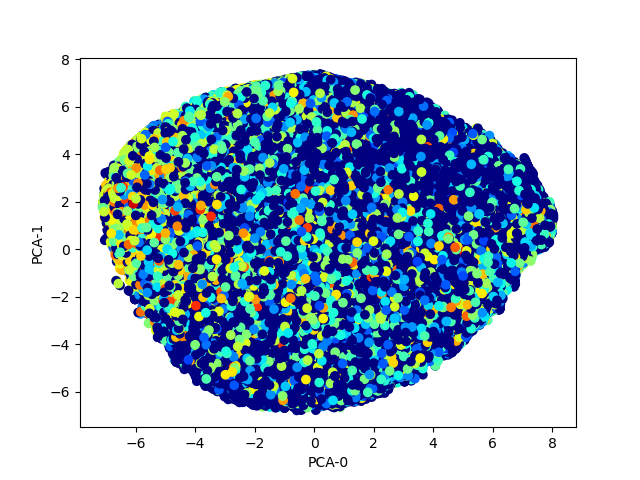

In [14]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import cm
plt.figure()
plt.scatter(x_embedding[:,0], x_embedding[:,1], c=df["song_hotttnesss"].to_numpy(), cmap=cm.jet)
plt.xlabel("PCA-0")
plt.ylabel("PCA-1")
plt.show()

<IPython.core.display.Javascript object>


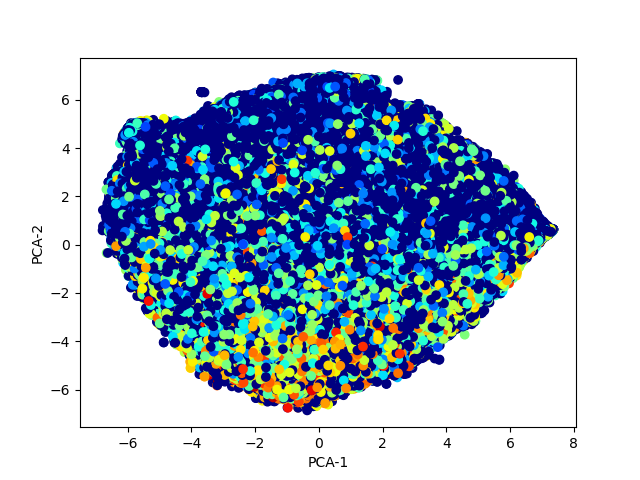

In [15]:
%matplotlib notebook
plt.figure()
plt.scatter(x_embedding[:,1], x_embedding[:,2], c=df["song_hotttnesss"].to_numpy(), cmap=cm.jet)
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.show()

<IPython.core.display.Javascript object>


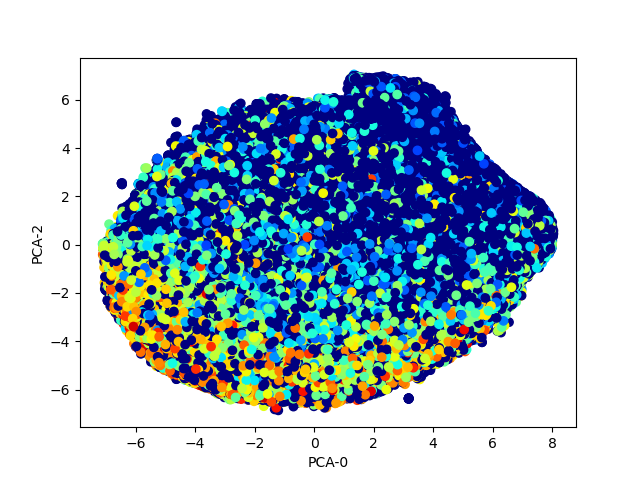

In [20]:
%matplotlib notebook
plt.figure()
plt.scatter(x_embedding[:,0], x_embedding[:,2], c=df["song_hotttnesss"].to_numpy(), cmap=cm.jet)
plt.xlabel("PCA-0")
plt.ylabel("PCA-2")
plt.show()

## PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
pca.fit(df[tsne_columns])

PCA(svd_solver='full')

<IPython.core.display.Javascript object>


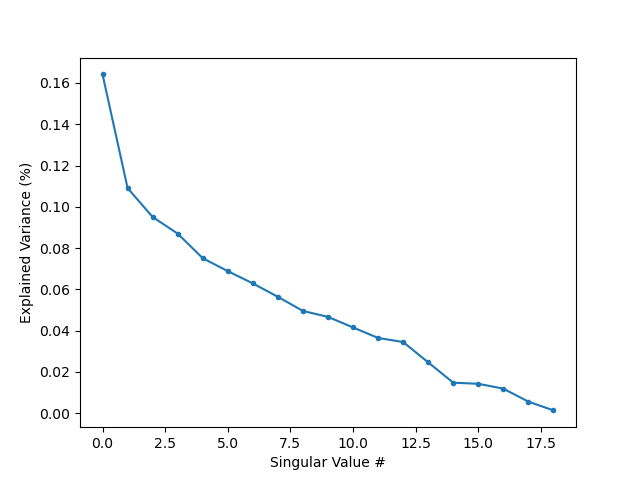

In [24]:
%matplotlib notebook
plt.figure()
plt.plot(pca.explained_variance_ratio_, '.-')
plt.xlabel("Singular Value #")
plt.ylabel("Explained Variance (%)")
plt.show()

# Try setting data between -1 and 1

In [22]:
from sklearn.preprocessing import MaxAbsScaler
maxabs_scalar = MaxAbsScaler()
maxabs_scalar.fit(df[tsne_columns])

MaxAbsScaler()

In [23]:
# Save the std_scalar
import pickle
with open("G:\\My Drive\\GT-Analytics\\CSE-6242\\Project\\msd-data\\maxabs_scalar.pkl", "wb") as f:
    pickle.dump(maxabs_scalar, f)

In [24]:
# Overwrite the columns
df[tsne_columns] = maxabs_scalar.transform(df[tsne_columns])
# Save this data frame
df.to_pickle("G:\\My Drive\\GT-Analytics\\CSE-6242\\Project\\msd-data\\maxabs_msd.pkl")

In [25]:
pca = PCA(svd_solver='full')
pca.fit(df[tsne_columns])

PCA(svd_solver='full')

<IPython.core.display.Javascript object>


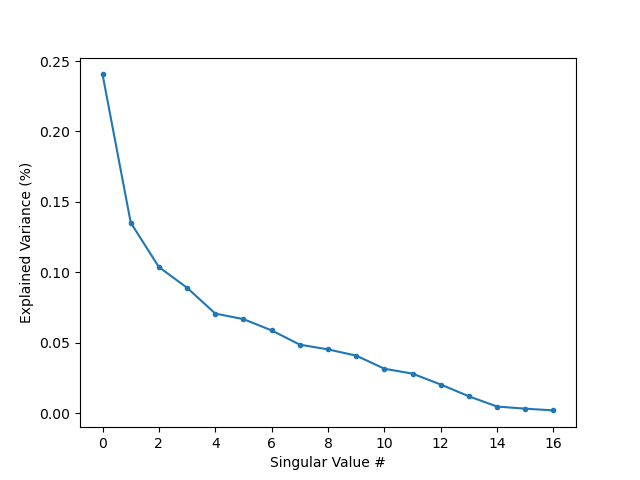

In [27]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.figure()
plt.plot(pca.explained_variance_ratio_, '.-')
plt.xlabel("Singular Value #")
plt.ylabel("Explained Variance (%)")
plt.show()

In [28]:
# Transform to 3
pca = PCA(n_components=3, svd_solver='full')
pca_features = pca.fit_transform(df[tsne_columns])

<IPython.core.display.Javascript object>


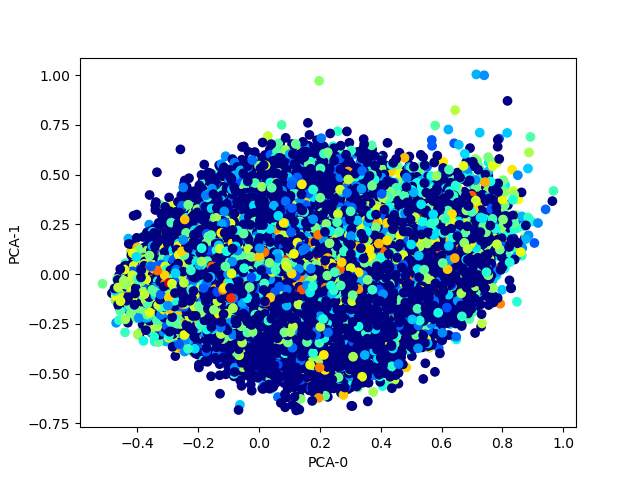

In [29]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import cm
plt.figure()
plt.scatter(pca_features[:,0], pca_features[:,1], c=df["song_hotttnesss"].to_numpy(), cmap=cm.jet)
plt.xlabel("PCA-0")
plt.ylabel("PCA-1")
plt.show()

<IPython.core.display.Javascript object>


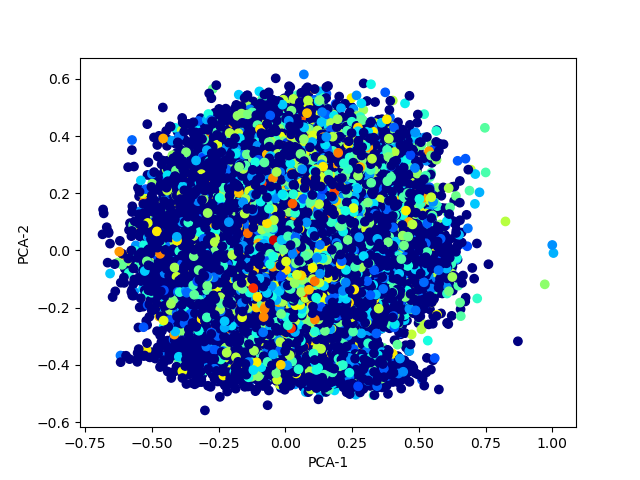

In [30]:
%matplotlib notebook
plt.figure()
plt.scatter(pca_features[:,1], pca_features[:,2], c=df["song_hotttnesss"].to_numpy(), cmap=cm.jet)
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.show()

<IPython.core.display.Javascript object>


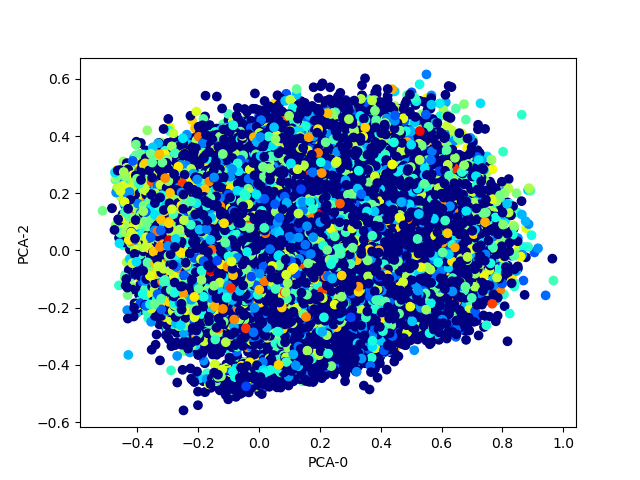

In [31]:
%matplotlib notebook
plt.figure()
plt.scatter(pca_features[:,0], pca_features[:,2], c=df["song_hotttnesss"].to_numpy(), cmap=cm.jet)
plt.xlabel("PCA-0")
plt.ylabel("PCA-2")
plt.show()

In [41]:
with open("G:\\My Drive\\GT-Analytics\\CSE-6242\\Project\\msd-data\\maxabs_scalar_pca.pkl", "wb") as f:
    pickle.dump(pca, f)
    
with open("G:\\My Drive\\GT-Analytics\\CSE-6242\\Project\\msd-data\\maxabs_scalar_pca_features.pkl", "wb") as f:
    pickle.dump(pca_features, f)

In [42]:
df["PCA-0"] = pca_features[:, 0]
df["PCA-1"] = pca_features[:, 1]
df["PCA-2"] = pca_features[:, 2]
df.to_pickle("G:\\My Drive\\GT-Analytics\\CSE-6242\\Project\\msd-data\\maxabs_msd_w_pca.pkl")

In [43]:
df.head()

,msd_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,song_id,song_title,song_hotttnesss,year,loudness,...,timbre_05,timbre_06,timbre_07,timbre_08,timbre_09,timbre_10,timbre_11,PCA-0,PCA-1,PCA-2
0,TRAAAAK128F9318786,ARJNIUY12298900C91,Adelitas Way,0.639903,0.426159,SOBLFFE12AF72AA5BA,Scream,0.733372,2009,-0.081973,...,-0.112243,-0.005520,-0.021603,0.089440,0.088833,-0.006354,0.059054,-0.221893,-0.054520,-0.123885
0,TRAAAAV128F421A322,AR73AIO1187B9AD57B,Western Addiction,0.671755,0.357141,SOQPWCR12A6D4FB2A3,A Poor Recipe For Civic Cohesion,0.481694,2005,-0.124446,...,-0.086998,-0.043104,-0.040379,0.029748,0.078778,-0.012725,0.018287,-0.175292,-0.038876,-0.089835
0,TRAAAAW128F429D538,ARD7TVE1187B99BFB1,Casual,0.581794,0.371359,SOMZWCG12A8C13C480,I Didn't Mean To,0.602120,0,-0.192461,...,0.091261,0.080435,0.011875,0.038123,0.146659,-0.140871,0.049893,-0.017560,0.018456,0.066878
0,TRAAAAY128F42A73F0,ARL752Q1187FB35EFE,Alquimia,0.476941,0.283676,SOJDASC12A8C13EB49,The Lark In The Clear Air,0.000000,0,-0.226529,...,-0.007999,-0.117692,-0.032357,0.108555,-0.040492,-0.017346,0.021924,0.231016,0.084934,-0.039714
0,TRAAABD128F429CF47,ARMJAGH1187FB546F3,The Box Tops,0.630630,0.385680,SOCIWDW12A8C13D406,Soul Deep,0.000000,1969,-0.169188,...,0.030393,0.049083,-0.034290,0.030223,0.035008,-0.028589,0.015854,-0.037277,0.068810,0.046090
